In [123]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

In [124]:
## Ne garder que les images câblées

liste=[]
dossier="D:/Documents/MINES/Info/projet_cern/ModulePictures"

for fichier in os.listdir(dossier):
    if os.path.isfile(os.path.join(dossier, fichier)) and ("AfterBonding" in os.path.basename(fichier)):
        liste.append(str(dossier + "/"+ os.path.basename(fichier)))

liste_images=[plt.imread(image) for image in liste]

In [125]:
## Fonctions utiles

def norme(pix):
    return np.sqrt(pix[0]**2+pix[1]**2+pix[2]**2)

In [126]:
## Trouver la colonne verte

def find_colonne(image):
    colonnes=[image[:,i,:] for i in range(image.shape[1])]
    i=0
    bool=False
    while not bool and i<len(colonnes):
        col=colonnes[i]
        for pix in col:
            if (pix[1]>50) and (pix[0]<30) and (pix[2]<30):
                bool=True
        if not bool:
            i+=1
    return i, colonnes[i]

799


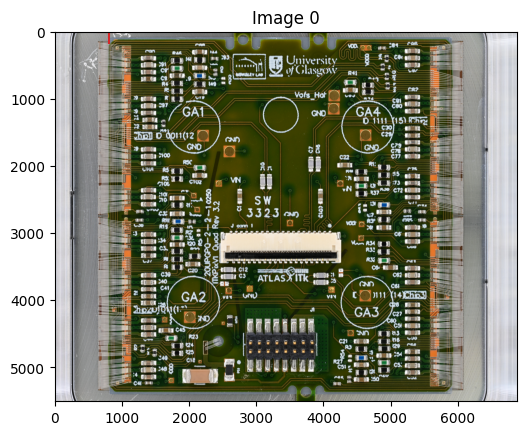

KeyboardInterrupt: 

In [127]:
## Test

for i,im in enumerate(liste_images):
    print(find_colonne(im)[0])
    plt.scatter(find_colonne(im)[0], 0, color='tab:red', marker='+', s=300)
    plt.title(f'Image {i}')
    plt.imshow(im)
    plt.show()